In [122]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sales_data_with_discounts.csv")

# Display the first few rows
display(df.head())

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [50]:
# Display descriptive statistics
display(df.describe())

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


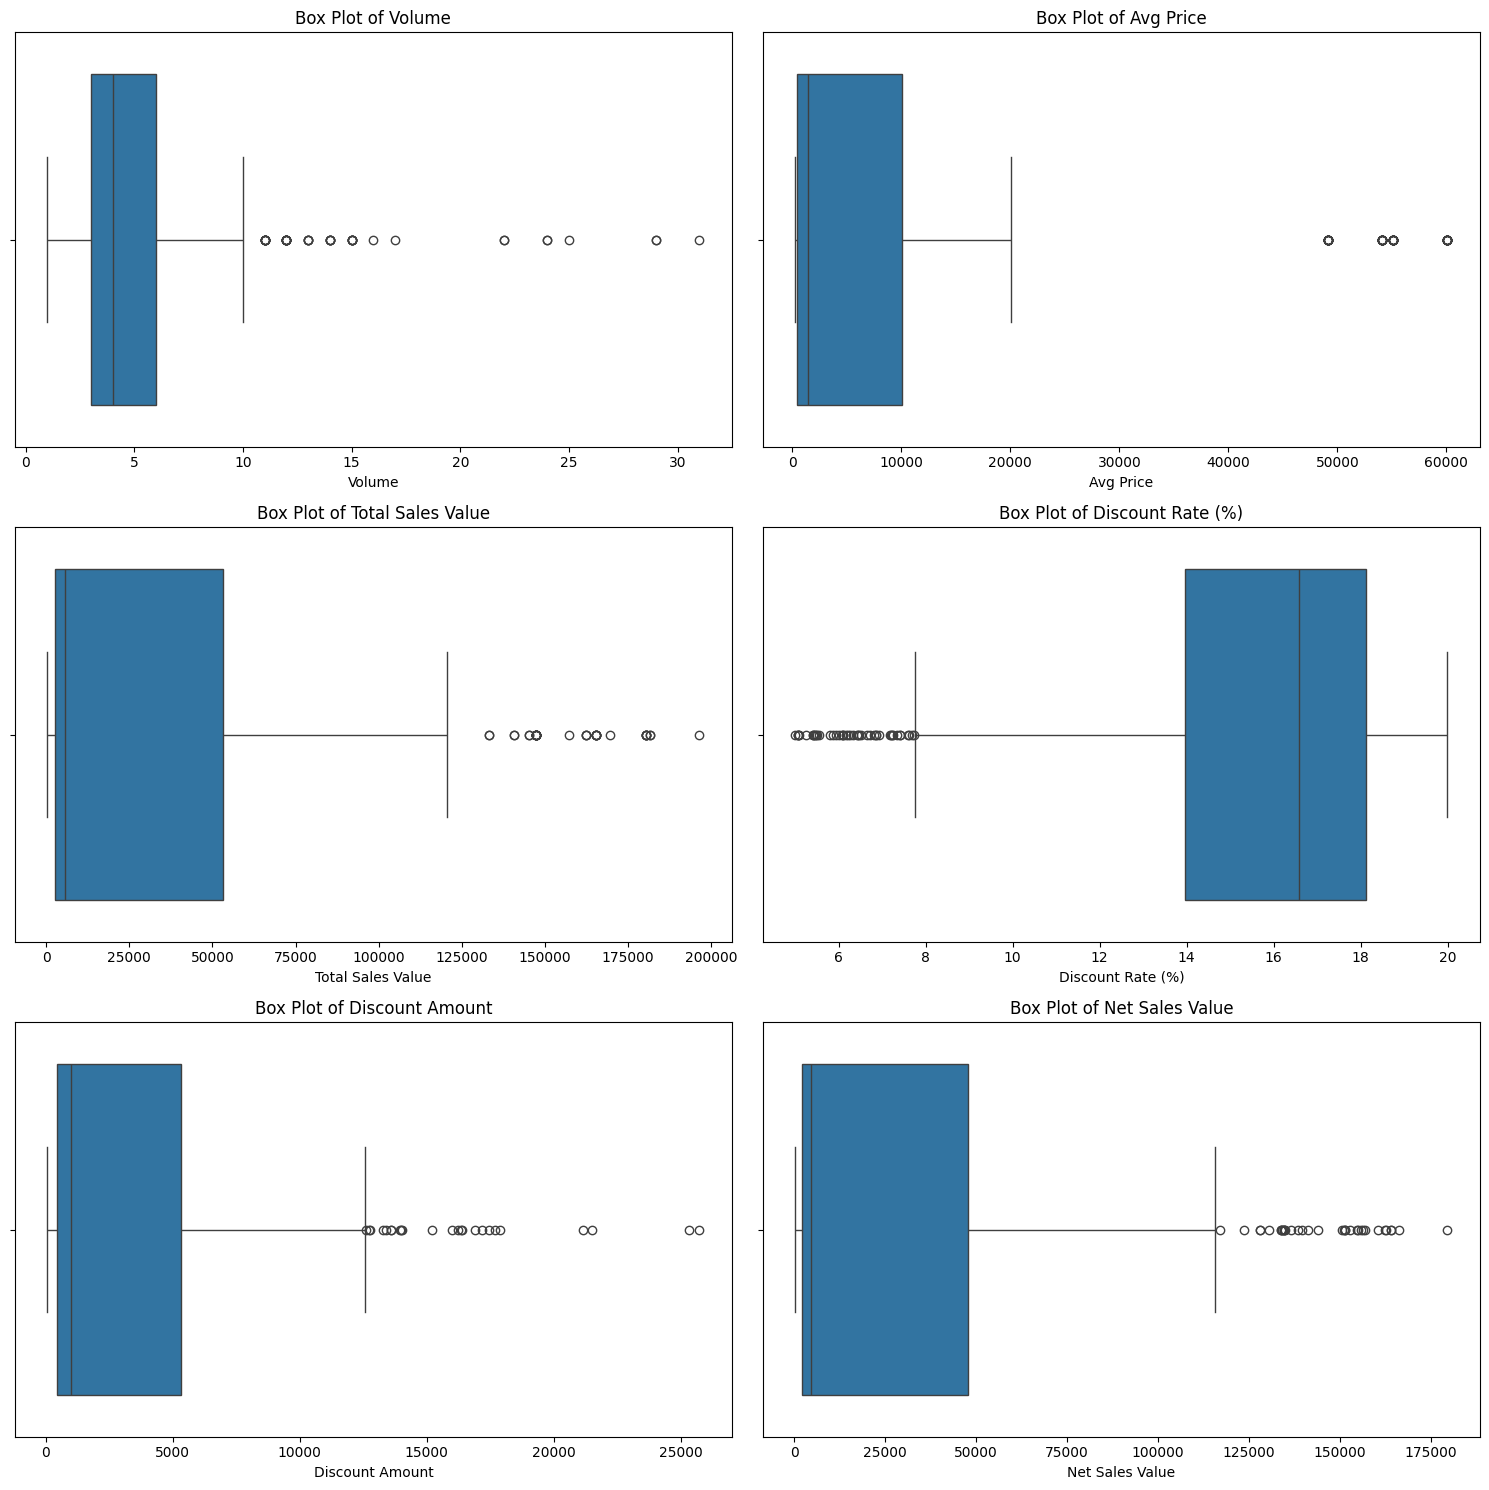

In [121]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for each numerical column to visualize outliers
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

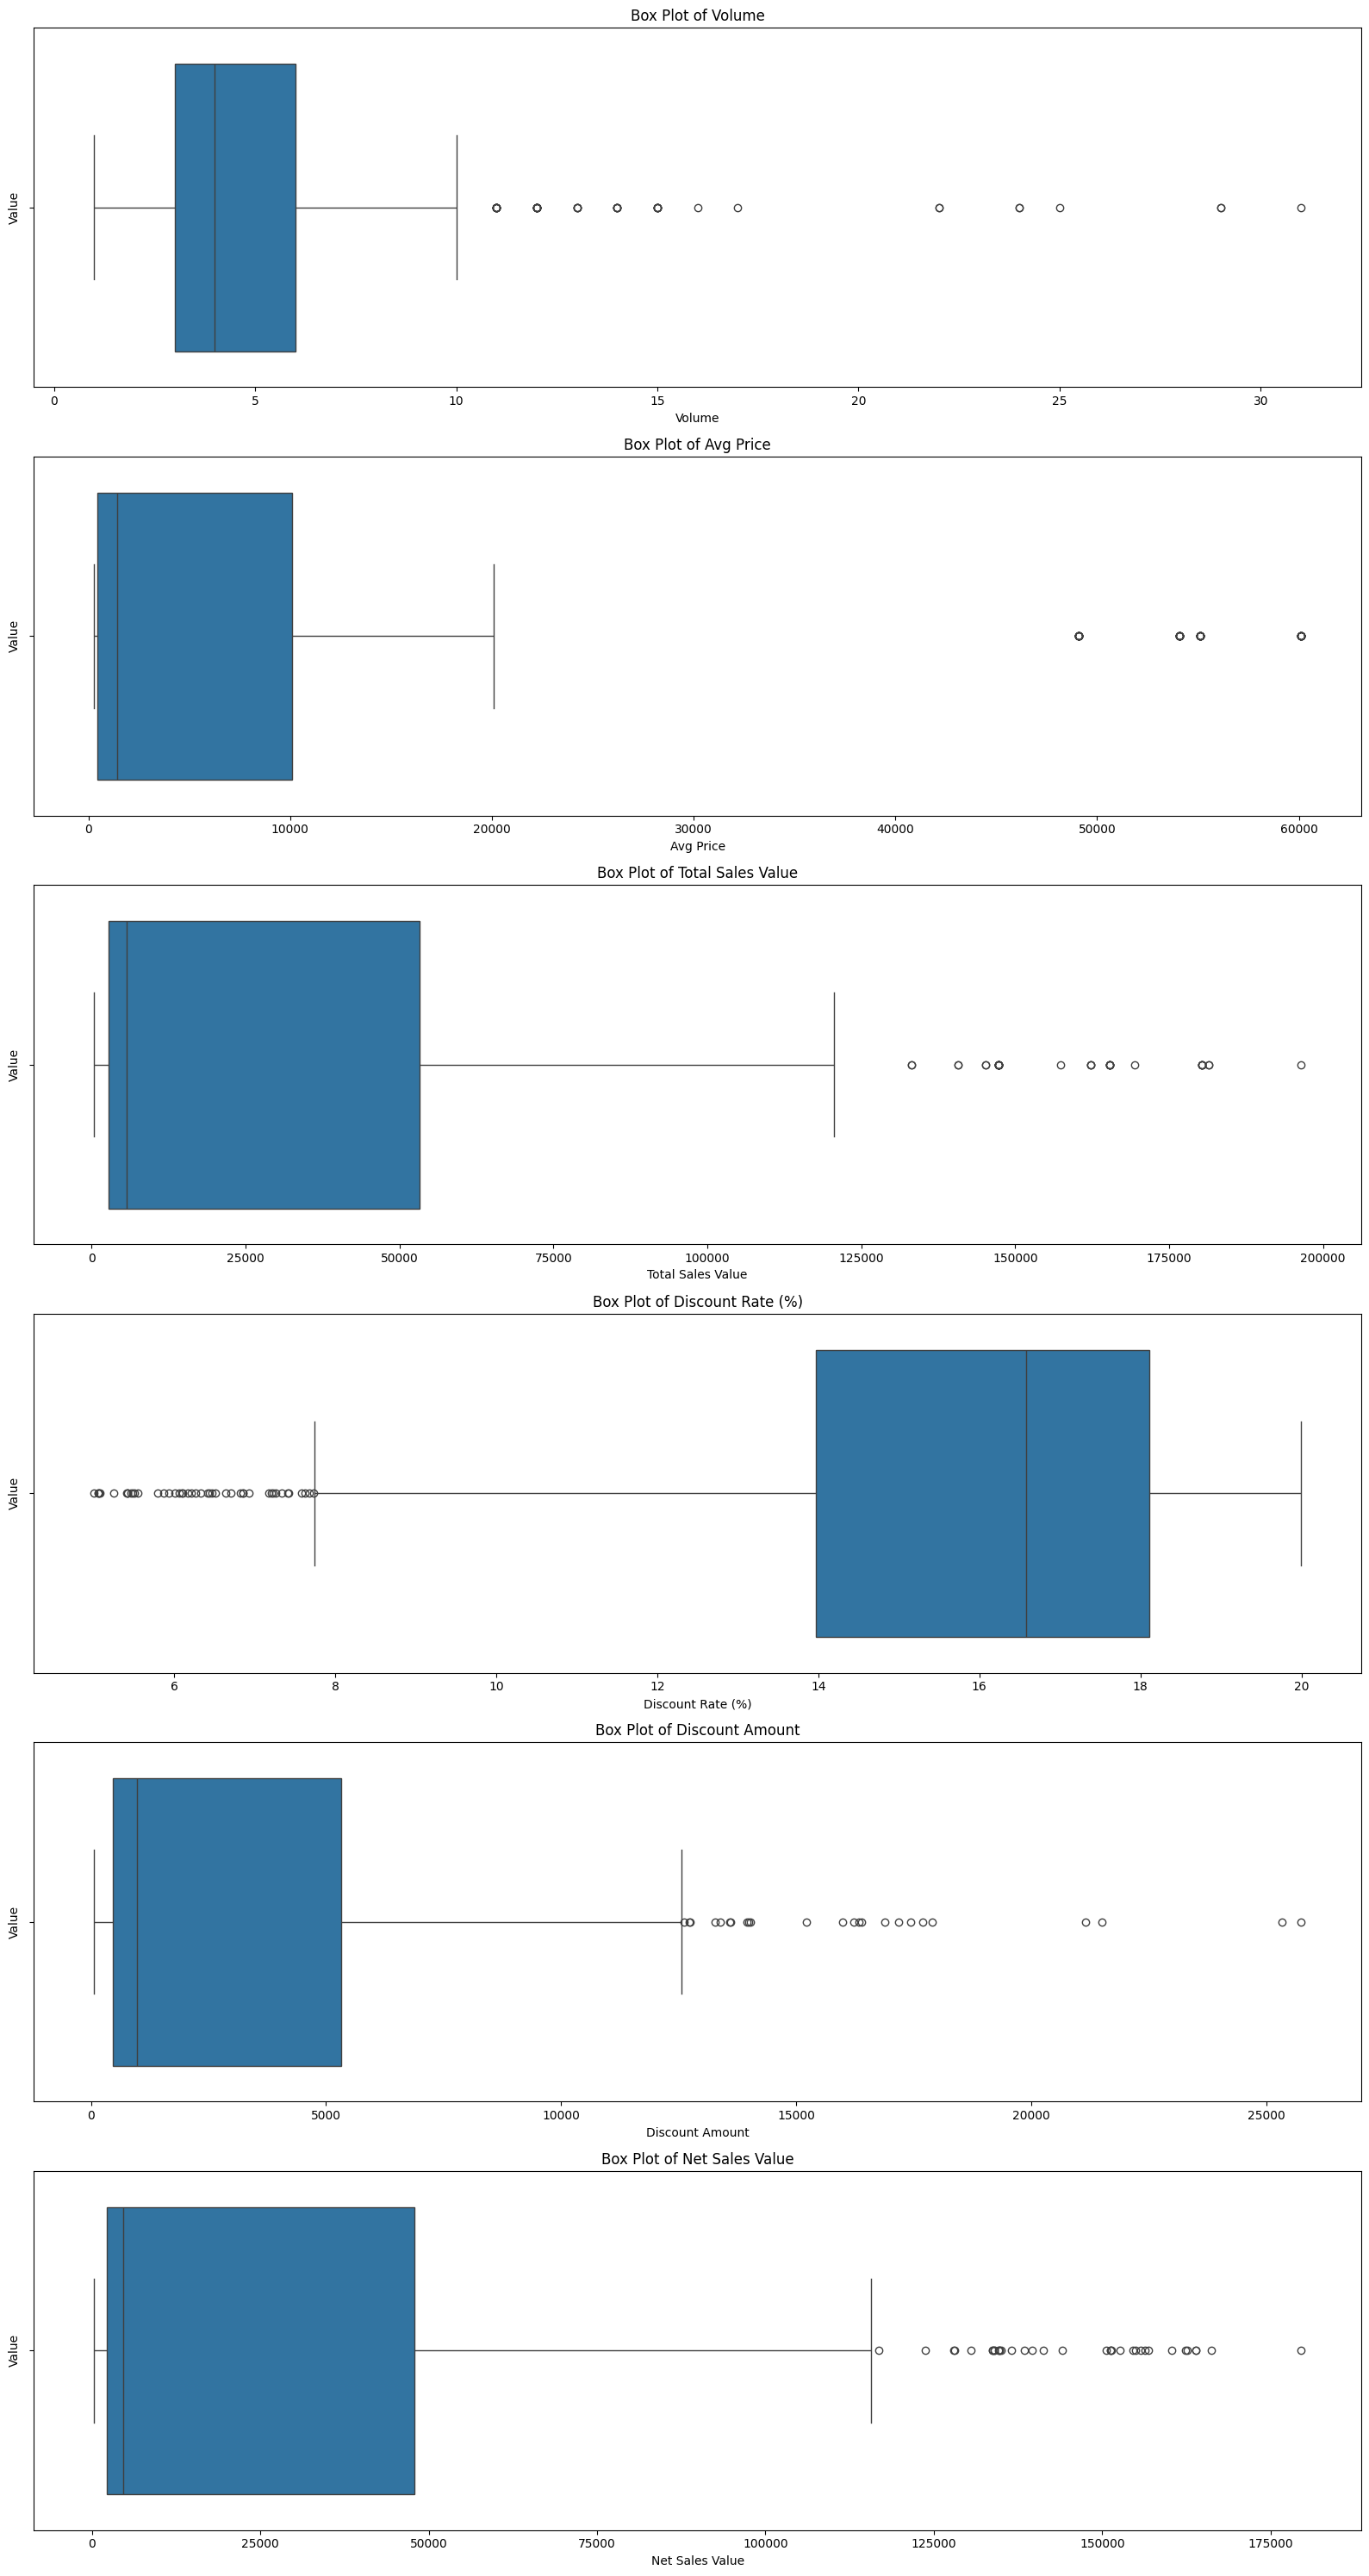

In [84]:
# Create box plots for each numerical column to visualize outliers
cols = 1
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


In [54]:
from scipy.stats import zscore
import numpy as np


In [55]:
# Identify numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [56]:
# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(df[numerical_cols]))

In [57]:

# Define a threshold for identifying outliers
threshold = 3

In [58]:
# Identify rows with outliers
outlier_rows = df[(z_scores > threshold).any(axis=1)]

In [59]:
print("Rows identified as outliers based on Z-score threshold of 3:")
display(outlier_rows)

Rows identified as outliers based on Z-score threshold of 3:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
9,01-04-2021,Thursday,M10,C,3,Mobiles,Orange,O-11,60100,180300,9.928444,17900.983733,162399.016267
30,02-04-2021,Friday,M01,C,11,Mobiles,RealU,RU-10,12100,133100,13.107140,17445.603828,115654.396172
40,02-04-2021,Friday,F01,C,29,FMCG,Babaji,Babaji Oil,400,11600,19.688074,2283.816576,9316.183424
66,03-04-2021,Saturday,M07,C,4,Mobiles,Sumsang,S-20,49100,196400,8.601080,16892.520951,179507.479049
70,03-04-2021,Saturday,F01,C,24,FMCG,Babaji,Babaji Oil,400,9600,17.050297,1636.828489,7963.171511
100,04-04-2021,Sunday,F01,C,25,FMCG,Babaji,Babaji Oil,400,10000,17.932275,1793.227484,8206.772516
180,07-04-2021,Wednesday,M01,C,12,Mobiles,RealU,RU-10,12100,145200,11.830807,17178.331859,128021.668141
189,07-04-2021,Wednesday,M10,C,3,Mobiles,Orange,O-11,60100,180300,9.815204,17696.813621,162603.186379
190,07-04-2021,Wednesday,F01,C,22,FMCG,Babaji,Babaji Oil,400,8800,18.182749,1600.081938,7199.918062


In [60]:
# Remove outliers from the DataFrame
df_cleaned = df[(z_scores <= threshold).all(axis=1)].copy()

In [61]:
print("\nShape of the original DataFrame:", df.shape)
print("Shape of the DataFrame after removing outliers:", df_cleaned.shape)


Shape of the original DataFrame: (450, 13)
Shape of the DataFrame after removing outliers: (433, 13)


In [62]:
# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("Shape of the DataFrame after one-hot encoding:", df_encoded.shape)
display(df_encoded.head())

Shape of the DataFrame after one-hot encoding: (433, 94)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,3,8100,24300,16.996489,4130.146805,20169.853195,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding the target variable if there is one)
# For this dataset, all numerical columns are features
numerical_cols_for_scaling = df_encoded.select_dtypes(include=['float64', 'int64']).columns

In [64]:
# Initialize the StandardScaler
scaler = StandardScaler()


In [65]:
# Apply StandardScaler to the numerical columns
df_scaled = df_encoded.copy()
df_scaled[numerical_cols_for_scaling] = scaler.fit_transform(df_encoded[numerical_cols_for_scaling])

In [66]:
print("Shape of the DataFrame after scaling:", df_scaled.shape)
display(df_scaled.head())

Shape of the DataFrame after scaling: (433, 94)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
1,1.778471,-0.011019,1.466467,-0.850308,2.241697,1.389799,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.793297,0.323245,1.713184,-1.346011,1.977819,1.680068,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.464905,0.546087,1.879771,-1.940185,1.383339,1.912724,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.520269,-0.122441,-0.150899,0.666095,0.348983,-0.194057,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,-0.520269,-0.122441,-0.150899,0.430646,0.286058,-0.188516,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
# Save the preprocessed data to a new CSV file
df_scaled.to_csv("preprocessed_sales_data.csv", index=False)

print("Preprocessed data saved to 'preprocessed_sales_data.csv'")

Preprocessed data saved to 'preprocessed_sales_data.csv'


In [103]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute and display basic statistical measures
display(numerical_cols.describe())

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [105]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate mean, median, mode, and standard deviation
mean = numerical_cols.mean()
median = numerical_cols.median()
mode = numerical_cols.mode().iloc[0] # mode() can return multiple values, so we take the first
std_dev = numerical_cols.std()

print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nStandard Deviation:\n", std_dev)

Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


Categorical columns identified: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


/tmp/ipython-input-3151225561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


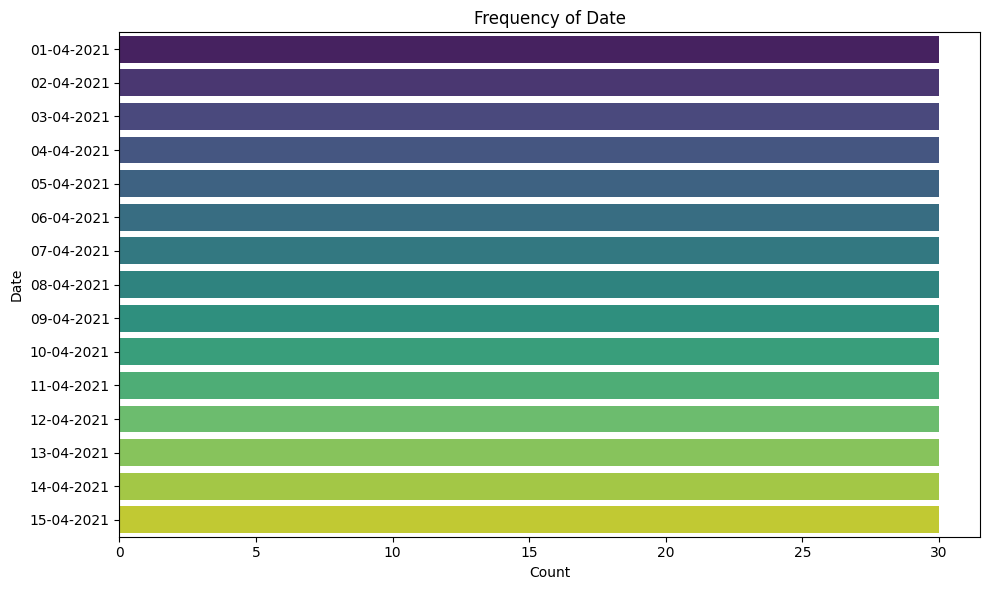

/tmp/ipython-input-3151225561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


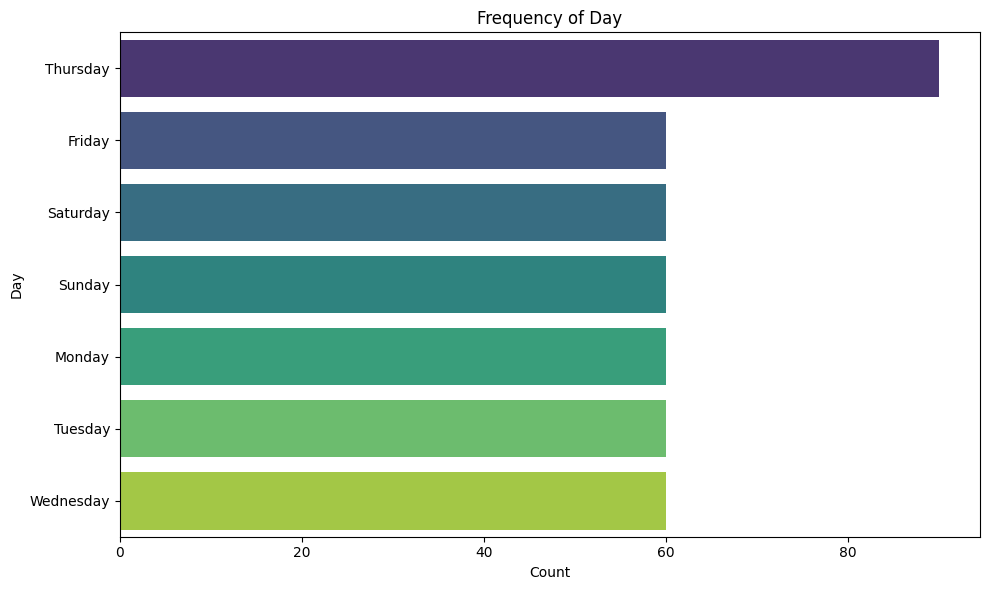

/tmp/ipython-input-3151225561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


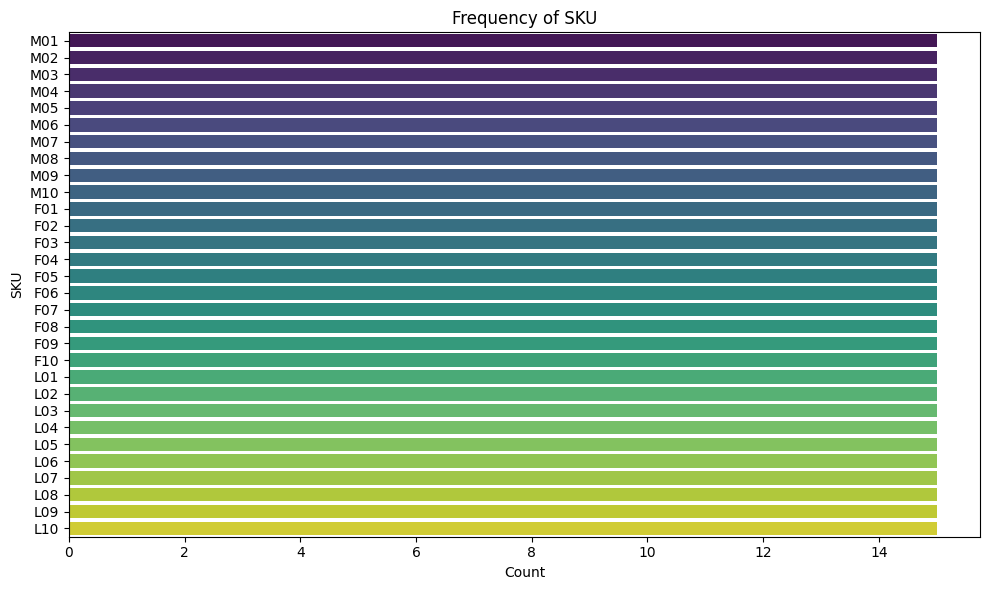

/tmp/ipython-input-3151225561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


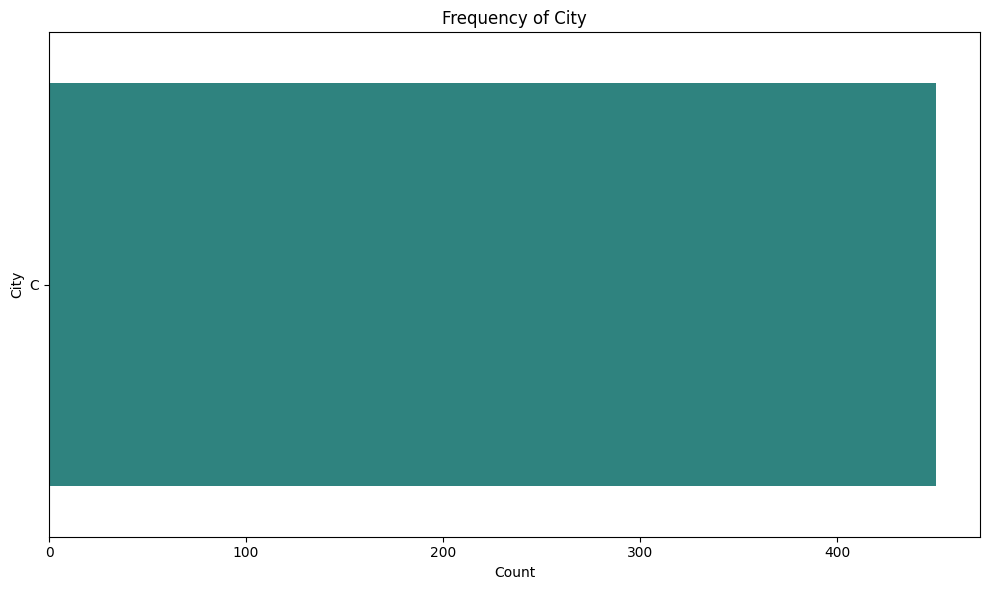

/tmp/ipython-input-3151225561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


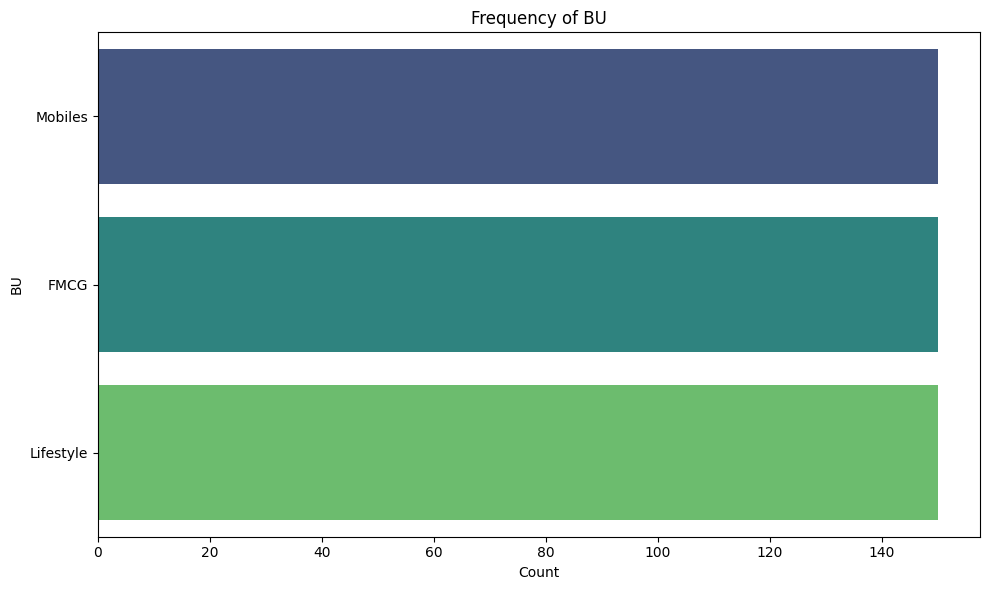

/tmp/ipython-input-3151225561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


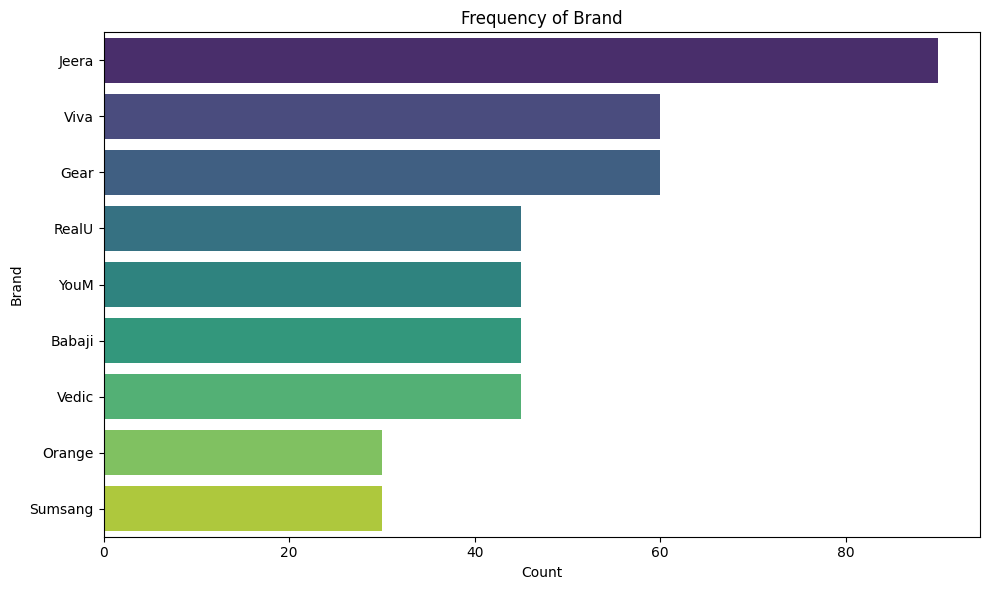

/tmp/ipython-input-3151225561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


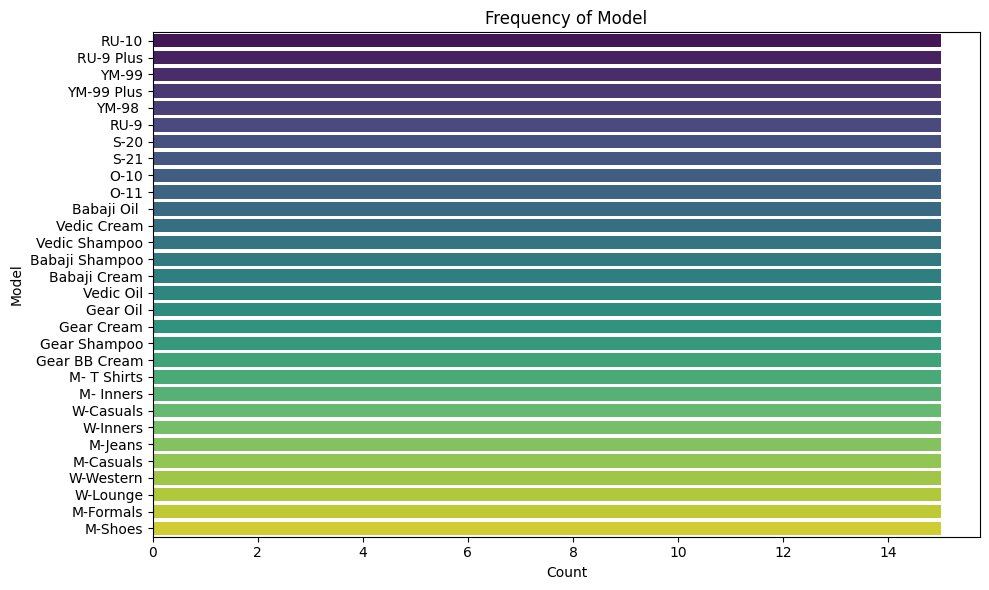

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical columns identified:", categorical_cols.tolist())

# Create bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

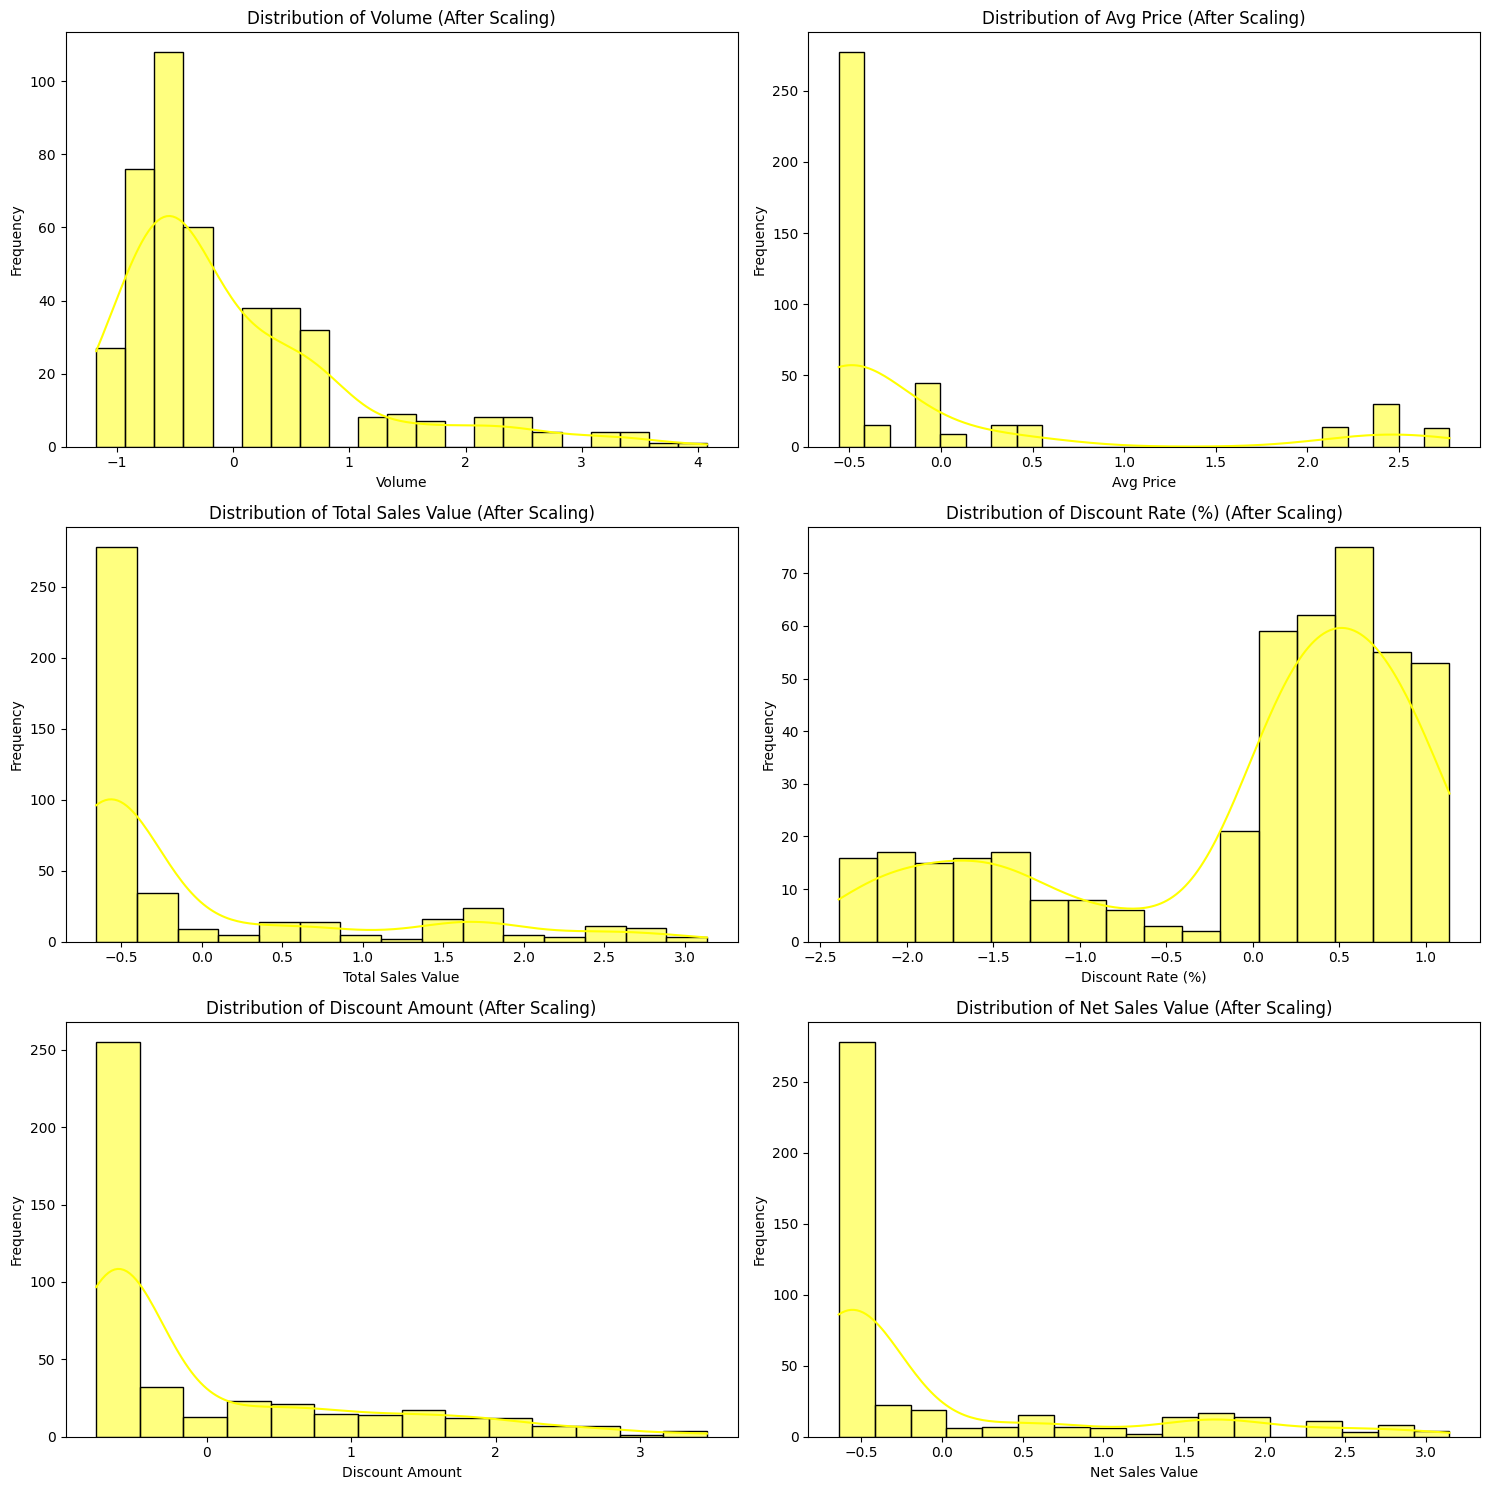

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for visualization (using the scaled df)
numerical_cols_scaled = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(numerical_cols_scaled) + n_cols - 1) // n_cols

# Create subplots for each numerical column after scaling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_scaled):
    sns.histplot(df_scaled[col], kde=True, ax=axes[i], color='yellow')
    axes[i].set_title(f'Distribution of {col} (After Scaling)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [118]:
# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("Shape of the DataFrame after one-hot encoding:", df_encoded.shape)
display(df_encoded.head())

Shape of the DataFrame after one-hot encoding: (433, 94)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,3,8100,24300,16.996489,4130.146805,20169.853195,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [119]:
from sklearn.model_selection import train_test_split

# Assuming 'Net Sales Value' is the target variable and the rest are features
X = df_scaled.drop('Net Sales Value', axis=1)
y = df_scaled['Net Sales Value']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (346, 93)
Shape of X_test: (87, 93)
Shape of y_train: (346,)
Shape of y_test: (87,)
